# Moving 7-Day Average of Confirmed cases of a Country

Confirmed cases of a country are based on dataset provided by JHU, namely Confirmed cases. The country are affected of SARS Covid-19 (aka Corona virus) outbreak. One dataset consist of countries with their daily cumulative confirmed cases of Covid19. <br>
Generally Confimed cases are people who have been tested positive of the coronavirus.

This script fetches the online datasets and parses through them for the required country and plots them in a line-plot format, along with daily positive (confirmed) cases registered<br>.
The graph shows the plot for 7-day Moving Average of Daily Confirmed cases and bar plots for daily confirmed cases as deviation from moving average.

Datasets can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
[Official github link]

Note: Country name being used in code is compulsorily same as in datasets' column *'Country/Region'*

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter

### Import and Load Dataset

#### Confirmed Cases Global
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Covid-19 Confirmed cases:
*'time_series_covid19_confirmed_global.csv'*

In [2]:
# Importing the raw csv file

Confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Confirmed_cases.iloc[0:5,:] # Printing the first 5 rows, not using .head() explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48


### Setting Duration with Terminal Dates

The global confirmed datasets have its starting date from index = 4, and the date is 22nd January 2020

In [3]:
# Storing Start and End Date in string format of 'DD M YYYY' (Here M is whole month)

BeginDate = datetime.strptime(Confirmed_cases.columns[4],'%m/%d/%y').strftime("%d %B %Y")
EndDate = datetime.strptime(Confirmed_cases.columns[-1],'%m/%d/%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

22 January 2020
17 May 2020


### Function for Parsing Data

The dataset consist of some countries which are divided into their different Provinces, therefore our first step is to add up all such data.

#### FetchConfirmedData Function

*Params*: Country Name

*Returns*: Single row of (no. of)cases data of length equal to duration of terminal dates

The function takes care of the (no. of)cases data only and adds up all the rows corresponding to the particular country. There are countries with single row data as well, function takes care of them too.

In [4]:
# Function returns a row of cases(numerical data) related to the dataset passed as a parameter for a particular country

def FetchConfirmedData(CountryName):
    
    Dataset = Confirmed_cases
    CountryRow = [0]*(Dataset.shape[1] - 4)
    
    for i in range(Dataset.shape[0]):
        if Dataset.iloc[i][1] == CountryName:
            for j in range(4,Dataset.shape[1]):
                CountryRow[j-4] += Dataset.iloc[i][j]
        
                
    return CountryRow

# --- Function Ends Here ---

### Function to plot Moving Average data

*Params*: List of countries

*Returns*: None

Function plots the moving 7-day average of daily confirmed cases (new positive cases). Function first calculates the daily confirmed cases from cumulative data and then the moving average of 7 days.<br>
Function then creates an 'error' i.e. difference in the moving average and daily cases and plots them in bar format rising/diving from the moving average line.

In [5]:
def PlotMovingAverage(CountryName):
    
    CountryCCdata = FetchConfirmedData(CountryName)
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    
    Daily_CC = [CountryCCdata[i] - CountryCCdata[i-1] for i in range(1, len(CountryCCdata))] 
    Daily_CC.insert(0, CountryCCdata[0])
    
    df = pd.DataFrame(Daily_CC, index = Dateslist)
    df['MA'] = df.iloc[:,0].rolling(window=7).mean()
    
    print(df)
    
    Errorp = []
    Errorn = []
    for i in range (df.shape[0]):
        err = df[0][i] - df['MA'][i]
        if err > 0:
            Errorp.append(err)
            Errorn.append(0)
        else:
            Errorn.append(-err)
            Errorp.append(0)
    
    plt.figure(figsize=(15,8))

    plt.errorbar(df.index, df['MA'], yerr=[Errorn, Errorp], fmt='-', color='indigo', label = 'Moving 7-day average', linewidth = 4, ecolor='skyblue', elinewidth=6, capsize=0)
           
    plt.plot(df.index[-1], Daily_CC[-1], marker='s', mfc='skyblue',mew = 1,mec = 'blue',  markersize=6)
    Boxtext1 = 'Cases Today: ' + str(Daily_CC[-1]) 
    plt.text(df.index[-1] + pd.DateOffset(days=2), Daily_CC[-1], Boxtext1, color='black', fontsize = 13, bbox=dict(facecolor='white', edgecolor= 'skyblue', boxstyle='round'))
    
    
    # Formating the graph
    plt.legend(loc="upper center", fontsize = 13, bbox_to_anchor=(0.5, 1.05))
    plt.grid(axis = 'y')
    
    myFmt = DateFormatter("%d-%b")
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    plt.xlabel('Date', fontsize = 13)
    plt.ylabel('Number of Cases', fontsize = 13) 
    plt.title('Daily confirmed cases and moving average(7-day) for '+ CountryName + ' as of ' + EndDate, fontsize = 15, pad=30)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.savefig('CountryMovingAvg.png')
    
    # --- Function Ends Here ---
    

### Finally the Plot

The plot is preceded by dataframe of the country passed. Also check image of the plot, saved in your system.

               0           MA
2020-01-22     0          NaN
2020-01-23     0          NaN
2020-01-24     0          NaN
2020-01-25     0          NaN
2020-01-26     0          NaN
...          ...          ...
2020-05-13  3763  3581.142857
2020-05-14  3942  3663.714286
2020-05-15  3787  3727.000000
2020-05-16  4864  3977.142857
2020-05-17  5050  4076.714286

[117 rows x 2 columns]


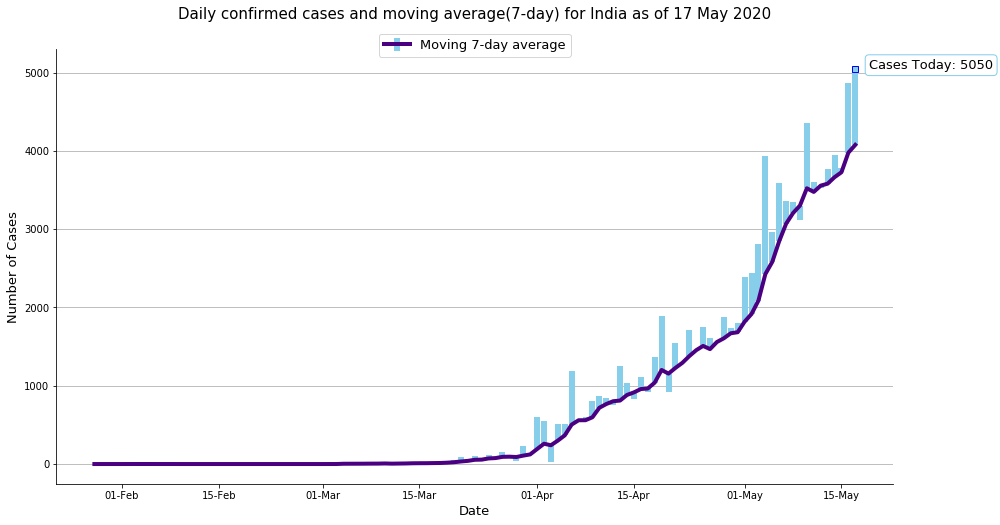

In [6]:
PlotMovingAverage('India') # Feel free to change the country